<a href="https://colab.research.google.com/github/vladislavlisin/alphatrans/blob/main/my_trans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Библиотеки

In [ ]:

# работаем в google colab
# подключаем гугл диск с данными
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

## Функции

In [ ]:
import numpy as np

def apk(recs, rels):
  x = 0
  sum = 0
  for i, rec_id in enumerate(recs):
    is_rel = (rec_id in rels)
    mult = 1 if is_rel else 0
    if is_rel:
      x += 1
    sum += mult * (x / (i+1))

  return sum / min(len(rels), len(recs))

def mapk(actual, predicted):
    return np.mean([apk(a, p) for a, p in zip(actual, predicted)])

In [ ]:
# https://github.com/benhamner/Metrics/blob/master/Python/ml_metrics/average_precision.py

# MAP@10

def apk(actual, predicted, k=10):
    if len(predicted) > k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    return np.mean([apk(a, p, k) for a, p in zip(actual, predicted)])

In [ ]:
mapk([[1,2,3,4,7,7,7,8,9,10]], [[1,2,3,4,7,7,7,8,9,10]])

1.0

## Получение данных

In [ ]:
# df_train = pd.read_csv('/kaggle/input/alfabankchallengedata/df_train.csv', sep=';')
# df_test = pd.read_csv('/kaggle/input/alfabankchallengedata/df_test.csv', sep=';')

df_train = pd.read_csv('/content/drive/MyDrive/alpha trans/df_train.csv', sep=';')
df_test = pd.read_csv('/content/drive/MyDrive/alpha trans/df_test.csv', sep=';')

In [ ]:
df_train.head()

,Id,Data,Target
0,0,"4814,4814,6010,6011,4814,6011,6011,4814,6011,6...","4814,4814,4814,4814,5411,4814,4814,4814,4814,4814"
1,1,"6011,6011,6011,6011,6011,6011,6011,4814,4814,4...","4814,6011,4814,6011,4814,4814,6011,4814,6011,4814"
2,2,"8021,6011,6011,6010,4829,4814,6011,6011,6011,6...","6011,6011,6010,4829,4829,6010,6011,6011,4814,6011"
3,3,"4814,6011,4814,4814,4814,6011,6011,5691,5691,5...","6011,6011,6010,6011,6011,4814,4814,6011,4814,4814"
4,4,"4814,4814,4814,4814,4814,4814,5946,4814,4814,6...","5499,6011,4814,4829,5200,5411,5499,5912,5411,5912"


In [ ]:
df_train['Data'] = df_train.Data.apply(lambda s: list(map(int, s.split(','))))
df_train['Target'] = df_train.Target.apply(lambda s: list(map(int, s.split(','))))
df_test['Data'] = df_test.Data.apply(lambda s: list(map(int, s.split(','))))

In [ ]:
df_train.head()

,Id,Data,Target
0,0,"[4814, 4814, 6010, 6011, 4814, 6011, 6011, 481...","[4814, 4814, 4814, 4814, 5411, 4814, 4814, 481..."
1,1,"[6011, 6011, 6011, 6011, 6011, 6011, 6011, 481...","[4814, 6011, 4814, 6011, 4814, 4814, 6011, 481..."
2,2,"[8021, 6011, 6011, 6010, 4829, 4814, 6011, 601...","[6011, 6011, 6010, 4829, 4829, 6010, 6011, 601..."
3,3,"[4814, 6011, 4814, 4814, 4814, 6011, 6011, 569...","[6011, 6011, 6010, 6011, 6011, 4814, 4814, 601..."
4,4,"[4814, 4814, 4814, 4814, 4814, 4814, 5946, 481...","[5499, 6011, 4814, 4829, 5200, 5411, 5499, 591..."


In [ ]:
# выходная последовательность всегда длиной в 10, действительно...
len(df_train.Target[1])

10

In [ ]:
df_train.Target[1]

[4814, 6011, 4814, 6011, 4814, 4814, 6011, 4814, 6011, 4814]

In [ ]:
Counter(df_train.Data[1]).items()

dict_items([(6011, 41), (4814, 52), (4829, 3), (6010, 2), (5541, 1), (5732, 2)])

In [ ]:
df_train.Data[1]

In [ ]:
# заментим, что длина транзакицй разная
len(df_train.Data[0])

216

In [ ]:
df_train.shape

(7033, 3)

In [ ]:
df_train.dtypes

Id         int64
Data      object
Target    object
dtype: object

In [ ]:
df_test.head()

,Id,Data
0,0,"[4814, 4814, 6011, 6011, 6010, 6011, 6011, 481..."
1,1,"[6010, 6011, 6010, 5411, 5411, 5977, 6011, 601..."
2,2,"[4814, 6011, 5251, 6011, 7832, 5641, 5814, 482..."
3,3,"[6011, 4722, 4722, 4722, 4814, 6011, 6011, 482..."
4,4,"[4814, 4814, 4814, 6011, 4814, 4814, 4814, 481..."


In [ ]:
# заментим, что длина транзакицй разная
len(df_test.Data[1])

42

In [ ]:
df_test.shape

(7033, 2)

In [ ]:
df_test.dtypes

Id       int64
Data    object
dtype: object

## Baseline 1: топ10 MCC-кодов из train-части

MCC-код и соответствующее количество вхождений в train-часть

In [ ]:

top10_codes = df_train['Data'].explode().value_counts().head(10)
top10_codes

6011    700677
6010    490602
4814    473396
5411    472408
4829    307388
5499    164719
5541     68224
5912     65071
5331     61833
5812     52029
Name: Data, dtype: int64

In [ ]:
labelss = df_train['Data'].explode()
labelss

0       4814
0       4814
0       6010
0       6011
0       4814
        ... 
7032    6011
7032    6010
7032    6011
7032    4814
7032    6012
Name: Data, Length: 3328880, dtype: object

In [ ]:
mapk(df_train['Target'], [top10_codes.index]*len(df_train))

0.2742435829727881

## Baseline 2: cамые популярные транзакции пользователя.

**Если таких менее 10, то замешиваются топ10 популярных из всей выборки.**

In [ ]:
def get_top_codes(transactions, top_n=10, drop_from=5):
    transactions_stats = sorted(
        Counter(transactions).items(),
        key=lambda x: x[1],
        reverse=True
    )[:top_n]


    top_codes = [mcc_code for (mcc_code, count) in transactions_stats if count >= drop_from]
    top_codes += list(top10_codes.index)

    return top_codes[:10]

In [ ]:
df_train['pred_baseline_2'] = df_train['Data'].apply(get_top_codes)

In [ ]:
mapk(df_train['Target'], df_train['pred_baseline_2'])

0.3236094127683776

## Baseline 3: cамые популярные транзакции пользователя без популярных со всей выборки.

In [ ]:
# больше чем x процентов относительно всех транзакций - возможно это уже не
# спонтанная или редкая транзакция
import random

def custom_weighted_random(probabilities):
    # Предполагаем, что сумма вероятностей равна 1
    #print(sum(probabilities))
    # assert sum(probabilities) == 1

    #print(probabilities)
    # Создаем массив вероятностей
    probability_array = np.cumsum(list(probabilities))
    #print(probability_array)

    # Генерируем случайное число от 0 до 1
    random_number = np.random.random()

    index = 0
    while random_number > probability_array[index]:
        index += 1

    return index




def get_top_user_codes(transactions, top_n=10, drop_from_percent=0.00):

    #print("start action\n")
    transactions_stats = sorted(
        Counter(transactions).items(),
        key=lambda x: x[1],
        reverse=True
    )[:top_n]


    trans_count = len(transactions)
    #print(trans_count, transactions_stats)

    # промежуточный результат
    top_codes = [mcc_code for (mcc_code, count) in transactions_stats if count/trans_count >= drop_from_percent]
    #print(top_codes)




    # вдруг все значения оказались очень уникальными, дополним общими популярными
    if not top_codes:
      top_codes = list(top10_codes.index)
      reweightd_probs = dict()
    else:
      # расчитаем вероятность возникновения каждого кода у данного пользователя
      probs = {mcc_code : count/trans_count for (mcc_code, count) in transactions_stats if count/trans_count >= drop_from_percent}
      probs_sum = sum(list(probs.values()))
      reweightd_probs = {mcc_code : i/probs_sum for mcc_code, i in probs.items()}

    # а вдруг у клиента все транзакции уникальны и не наберётся и x процентов
    if not reweightd_probs:
      popular_sum = sum(list(top10_codes.values))
      reweightd_probs = dict(zip(list(top10_codes.index), [i/popular_sum for i in list(top10_codes.index)]))

    # смотрим, чтобы в принцепи у клиента было как минимум x уникальных мсс кодов
    # и чтобы эти коды были частыми, как минимум x процентов от общего числа транзакций

    arr = list(reweightd_probs.keys())
    #print(reweightd_probs)
    while len(top_codes) < 10:
      idx = custom_weighted_random(reweightd_probs.values())
      top_codes.append(arr[idx])
      #print(arr[idx])

    return top_codes[:10]

In [ ]:
df_train['pred_baseline_3'] = df_train['Data'].apply(get_top_user_codes)

In [ ]:
df_train['pred_baseline_3'][0]

[4814, 6011, 5311, 5411, 5921, 6010, 4814, 4814, 4814, 6011]

In [ ]:
df_train['Target'][0]

[4814, 4814, 4814, 4814, 5411, 4814, 4814, 4814, 4814, 4814]

In [ ]:
mapk(df_train['Target'], df_train['pred_baseline_3'])

0.32994401111314237

# ** Тип данных - последовательность. Возможно рассмотрение транзакций в виде временного категориального ряда, как моделировать?**

In [ ]:
min([len(i.Data) for _, i in df_train.iterrows()])

40

In [ ]:
def sample(preds, temperature):
    # helper function to sample an index from a probability array
    #print(preds)
    preds = np.asarray(preds[0]).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    #print(preds.shape)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


In [ ]:
temp = df_train['Data'].explode().value_counts()

In [ ]:
temp.values

array([700677, 490602, 473396, 472408, 307388, 164719,  68224,  65071,
        61833,  52029,  47010,  28977,  25985,  17171,  16852,  16533,
        14597,  14042,  13814,  11656,  11610,  11553,  11297,  10774,
         9917,   9742,   9357,   7881,   7767,   6607,   6606,   6569,
         6507,   6133,   6123,   6112,   5542,   5229,   5125,   4823,
         4456,   4354,   4144,   4006,   3913,   3787,   3761,   3708,
         3569,   3080,   2967,   2829,   2798,   2625,   2518,   2448,
         2269,   2204,   2061,   1721,   1632,   1600,   1563,   1443,
         1417,   1412,   1391,   1391,   1375,   1301,   1266,   1194,
         1111,   1075,   1044,   1005,    950,    947,    908,    890,
          864,    821,    819,    803,    746,    713,    669,    657,
          628,    606,    600,    572,    556,    549,    539,    533,
          442,    391,    360,    341,    340,    305,    294,    285,
          279,    272,    258,    250,    248,    239,    232,    229,
      

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=list(temp.index), y=labelss)
class_weights = dict(zip(list(temp.index), class_weights))

In [ ]:
class_weights

{6011: 0.0258203696288515,
 6010: 0.036876611042015284,
 4814: 0.038216924372902986,
 5411: 0.03829685172654736,
 4829: 0.058856361115055836,
 5499: 0.10983395437341643,
 5541: 0.26518144832368057,
 5912: 0.278030753030302,
 5331: 0.2925903503054159,
 5812: 0.3477241371241958,
 5814: 0.38484873708646633,
 5921: 0.6243482462102627,
 5999: 0.6962377960529068,
 5977: 1.0536217535632626,
 5311: 1.0735662906737944,
 5964: 1.0942804772536614,
 5691: 1.239414888705541,
 5983: 1.2884018751199817,
 5211: 1.3096669415400886,
 8999: 1.5521395959535675,
 5735: 1.5582893307868029,
 5200: 1.565977592870664,
 7995: 1.601464028541629,
 5661: 1.6792035576791147,
 7311: 1.824315733632629,
 5533: 1.8570867512250855,
 6012: 1.9334978230666648,
 5641: 2.295614659362363,
 5651: 2.3293085014078514,
 5722: 2.7382683714900535,
 4112: 2.738682883807869,
 5945: 2.75410855996876,
 4812: 2.7803502582503126,
 5941: 2.949900396288078,
 4900: 2.954718133339014,
 5261: 2.960035852492602,
 5732: 3.2644783707027756,
 56

In [ ]:
def custom_weighted_random(probabilities):
    # Предполагаем, что сумма вероятностей равна 1
    #print(sum(probabilities))
    # assert sum(probabilities) == 1

    #print(probabilities)
    # Создаем массив вероятностей
    probability_array = np.cumsum(list(probabilities))
    #print(probability_array)

    # Генерируем случайное число от 0 до 1
    random_number = np.random.random()

    index = 0
    while random_number > probability_array[index]:
        index += 1

    return index

In [ ]:

# закодируем мсс коды вероятностями их возникновения

def predict_seq(trans):

  pred_length = 10

  transactions_stats = sorted(
        Counter(trans).items(),
        key=lambda x: x[1],
        reverse=True
    )

  # нашли вероятности появления мсс кодов
  trans_count = len(trans)
  mcc2probs = {mcc_code : count/trans_count for (mcc_code, count) in transactions_stats}
  # probs2mcc = {count/trans_count : mcc_code for (mcc_code, count) in transactions_stats}

  # гиперпараметры
  window = 100
  forget_rate = 0.8

  trans_len = len(trans)
  win_arr = trans[trans_len-window:]
  coefs = [forget_rate**i for i in range(window)[::-1]]

  #print(coefs)
  #print(mcc2probs)
  #print(" ")

  trans10 = []

  i = 0
  while i < pred_length:

    print(i)
    # значения во временном окне
    mcc2values = dict(zip(win_arr, window*[0]))


    # считаем авторегрессионные значения
    values = [i*mcc2probs[j]*class_weights[j] for i, j in zip(coefs, win_arr)]


    summa = sum(values)

    for j, val in zip(win_arr, values):
      mcc2values[j] += val/summa

    arr = list(mcc2values.keys())
    k = custom_weighted_random(mcc2values.values())
    mcc_code = arr[k]
    print(mcc2values)
    #mcc_code = max(mcc2values, key=mcc2values.get)

    print(mcc_code)
    win_arr.append(mcc_code)
    print(win_arr)
    win_arr = win_arr[1:]
    trans10.append(mcc_code)
    i += 1
    print()


  print("generated", trans10)

  return trans10

In [ ]:
# validation

for _, i in df_train[["Data", "Target"]].iterrows():
  trg = predict_seq(i.Data)
  print("target", i.Target)
  if mapk([trg], [i.Target]) < 0.3:
    print(mapk([trg], [i.Target]))
    stop = input()


In [ ]:
mapk([[1,2,3,4,7,7,7,8,9,10]], [[1,2,3,4,7,7,7,8,9,10]])

0.1

In [ ]:
df_train['pred_baseline_4'] = df_train.apply(predict_seq)

0       [4814, 4814, 4814, 4814, 5411, 4814, 4814, 481...
1       [4814, 6011, 4814, 6011, 4814, 4814, 6011, 481...
2       [6011, 6011, 6010, 4829, 4829, 6010, 6011, 601...
3       [6011, 6011, 6010, 6011, 6011, 4814, 4814, 601...
4       [5499, 6011, 4814, 4829, 5200, 5411, 5499, 591...
                              ...                        
7028    [4814, 5499, 5499, 5411, 5251, 4814, 5499, 549...
7029    [6011, 5261, 6011, 5261, 4814, 5411, 4814, 601...
7030    [6011, 6011, 6011, 6011, 6011, 6011, 6011, 601...
7031    [4814, 6011, 6011, 5999, 5999, 6011, 6011, 601...
7032    [6011, 4829, 6010, 6011, 6011, 5411, 6011, 554...
Name: Target, Length: 7033, dtype: object


TypeError: ignored

In [ ]:
mapk(df_train['Target'], df_train['pred_baseline_4'])

0.09293331437508887

In [ ]:
df_train['Data'][7032]

In [ ]:
df_train['pred_baseline_4'][7032]

[6011, 6011, 6011, 6011, 6011, 6011, 6011, 6011, 6011, 6011]

In [ ]:
df_train['Target'][7032]

[6011, 4829, 6010, 6011, 6011, 5411, 6011, 5541, 6010, 4814]

In [ ]:
df_train['pred_baseline_2'][7032]

[6011, 4814, 5499, 6010, 5541, 4829, 5411, 6011, 6010, 4814]

In [ ]:
df_train

,Id,Data,Target,pred_baseline_2,pred_baseline_3,pred_baseline_4
0,0,"[4814, 4814, 6010, 6011, 4814, 6011, 6011, 481...","[4814, 4814, 4814, 4814, 5411, 4814, 4814, 481...","[4814, 6011, 5311, 5411, 6011, 6010, 4814, 541...","[4814, 6011, 5311, 5411, 5921, 6010, 5411, 531...","[4814, 4814, 4814, 4814, 4814, 4814, 4814, 481..."
1,1,"[6011, 6011, 6011, 6011, 6011, 6011, 6011, 481...","[4814, 6011, 4814, 6011, 4814, 4814, 6011, 481...","[4814, 6011, 6011, 6010, 4814, 5411, 4829, 549...","[4814, 6011, 4829, 6010, 5732, 5541, 6011, 481...","[6011, 6011, 6011, 6011, 6011, 6011, 6011, 601..."
2,2,"[8021, 6011, 6011, 6010, 4829, 4814, 6011, 601...","[6011, 6011, 6010, 4829, 4829, 6010, 6011, 601...","[5814, 6010, 4829, 6011, 4814, 5411, 5331, 599...","[5814, 6010, 4829, 6011, 4814, 5411, 5331, 599...","[5814, 5814, 5814, 5814, 5814, 5814, 5814, 581..."
3,3,"[4814, 6011, 4814, 4814, 4814, 6011, 6011, 569...","[6011, 6011, 6010, 6011, 6011, 4814, 4814, 601...","[5411, 4814, 6011, 6010, 6012, 5999, 6011, 601...","[5411, 4814, 6011, 6010, 6012, 5999, 5691, 549...","[5411, 5411, 5411, 5411, 5411, 5411, 5411, 541..."
4,4,"[4814, 4814, 4814, 4814, 4814, 4814, 5946, 481...","[5499, 6011, 4814, 4829, 5200, 5411, 5499, 591...","[4814, 5411, 6011, 4829, 5912, 5499, 6010, 520...","[4814, 5411, 6011, 4829, 5912, 5499, 6010, 520...","[4814, 4814, 4814, 4814, 4814, 4814, 4814, 481..."
...,...,...,...,...,...,...
7028,7028,"[6010, 4829, 6011, 6011, 6011, 6010, 6011, 601...","[4814, 5499, 5499, 5411, 5251, 4814, 5499, 549...","[5251, 4814, 5499, 6011, 6010, 4829, 5411, 601...","[5251, 4814, 5499, 6011, 6010, 4829, 5411, 553...","[5251, 5251, 5251, 5251, 5251, 5251, 5251, 525..."
7029,7029,"[4814, 5699, 5641, 5411, 6010, 6011, 4814, 601...","[6011, 5261, 6011, 5261, 4814, 5411, 4814, 601...","[6011, 4814, 5411, 5912, 6010, 5499, 4900, 581...","[6011, 4814, 5411, 5912, 6010, 5499, 4900, 581...","[6011, 6011, 6011, 6011, 6011, 6011, 6011, 601..."
7030,7030,"[6011, 6011, 6011, 6011, 6011, 6011, 6011, 601...","[6011, 6011, 6011, 6011, 6011, 6011, 6011, 601...","[6011, 6011, 6010, 4814, 5411, 4829, 5499, 554...","[6011, 6010, 5411, 5912, 5200, 6011, 6011, 601...","[6011, 6011, 6011, 6011, 6011, 6011, 6011, 601..."
7031,7031,"[4814, 4814, 5411, 6011, 6011, 4814, 4814, 481...","[4814, 6011, 6011, 5999, 5999, 6011, 6011, 601...","[6011, 5499, 4814, 5999, 6010, 6011, 6010, 481...","[6011, 5499, 4814, 5999, 6010, 4829, 5942, 541...","[6011, 6011, 6011, 6011, 6011, 6011, 6011, 601..."


259


<Axes: >

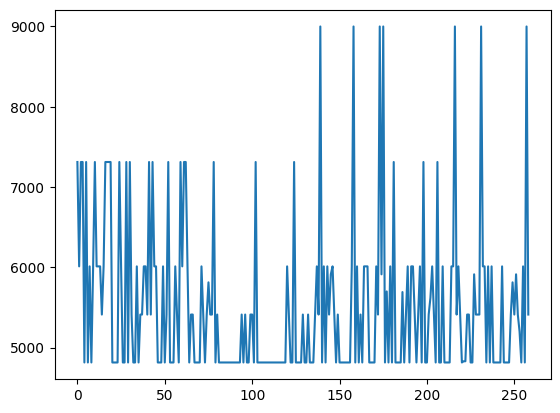

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#create DataFrame
print(len(df_train['Data'][100]))

sns.lineplot(data=df_train['Data'][100])

# **3 varient**

In [ ]:
mcc_codes_test = set()

for _, i in df_test.iterrows():
  mcc_codes_test |= set(i.Data)

In [ ]:
mcc_codes_test = set()

for _, i in df_test.iterrows():
  mcc_codes_test |= set(i.Data)

mcc_codes = set()

for _, i in df_train.iterrows():
  mcc_codes |= set(i.Data)

In [ ]:
len(mcc_codes_test | mcc_codes)

184

In [ ]:
# кодируем метки

mcc2label = {j: i for i, j in enumerate(mcc_codes_test)}
label2mcc = {i: j for i, j in enumerate(mcc_codes_test)}

In [ ]:
# крайний элемент
label2mcc[183]

5631

In [ ]:
! pip install torchtext

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import spacy
import numpy as np

import random
import math
import time

In [ ]:
SEED = 1234

# Мы установим случайные начальные числа для получения детерминированных результатов.

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [ ]:
# последовательности разной длины
from keras.utils import pad_sequences

# 184 is sos
# 185 is eos
# 186 is pad

# all seqs like [sos, .... , eos]

def process_seq(seq, max_seq_len):
  # будем рассматривать seq длины 500, и конвертировать их в seq длины 10
  # то есть 498 символов + 2 служебных
  if len(seq) >= max_seq_len - 1:
      seq = [184] + seq[len(seq)-max_seq_len + 2:] + [185]
  else:
      cut = seq
      # ветка для чисел меньше 499, иначе отрицательные числа
      to_pad = max_seq_len - len(seq) - 2
      seq = [184] + [186]*to_pad + seq + [185]


  return seq

In [ ]:
# 184 is sos
# 185 is eos
# 186 is pad

# all seqs like [sos, .... , eos]

X = []
Y = []

# создаём наши послоедовательности
for _, i in df_train.iterrows():
    datas = list(map(lambda x: mcc2label[x], i.Data))
    y = list(map(lambda y: mcc2label[y], i.Target))
    X.append(process_seq(datas, max_seq_len = 500))
    Y.append(process_seq(y, max_seq_len = 500))


In [ ]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):

    def __init__(self, src, trg):
        self.X = src
        self.y = trg

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, index):
        return (self.X[index], self.y[index])

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_array = torch.LongTensor(X) #.to(device)
Y_array = torch.LongTensor(Y) #.to(device)

In [ ]:
Y_array[0]

tensor([184, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 1

In [ ]:

from sklearn.model_selection import train_test_split

# данные в виде листов
X_train, X_test, y_train, y_test = train_test_split(X_array, Y_array, train_size=0.9, test_size=0.1 , random_state=0)

In [ ]:
train_ds = MyDataset(X_train, y_train)
test_ds = MyDataset(X_test, y_test)

In [ ]:
from torch.utils.data import DataLoader
# словарь по сути уже готов, причем там указаны все мсс коды из тех что были в трэйне

BATCH_SIZE = 32

train_dl = DataLoader(train_ds,
           batch_size=BATCH_SIZE,
           shuffle=False
           )

test_dl = DataLoader(test_ds,
           batch_size=BATCH_SIZE,
           shuffle=False
           )

In [ ]:
for i in test_dl:
  print(i[1][1])
  break

tensor([184, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186,
        186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 1

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()

        self.hid_dim = hid_dim
        self.n_layers = n_layers

        self.embedding = nn.Embedding(input_dim,
                                      emb_dim,
                                      #padding_idx=186
                                      )

        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout = dropout)

        self.dropout = nn.Dropout(dropout)

    def forward(self, src):

        #src = [src len, batch size]

        #print(src)
        embedded = self.dropout(self.embedding(src))
        #print()

        #print(embedded)

        #embedded = [src len, batch size, emb dim]

        outputs, (hidden, cell) = self.rnn(embedded)

        #outputs = [src len, batch size, hid dim * n directions]
        #hidden = [n layers * n directions, batch size, hid dim]
        #cell = [n layers * n directions, batch size, hid dim]

        #outputs are always from the top hidden layer

        return hidden, cell




class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()

        self.output_dim = output_dim
        self.hid_dim = hid_dim
        self.n_layers = n_layers

        self.embedding = nn.Embedding(
            output_dim,
            emb_dim,
            #padding_idx=186
            )

        self.rnn = nn.LSTM(emb_dim, hid_dim, n_layers, dropout = dropout)

        self.fc_out = nn.Linear(hid_dim, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, input, hidden, cell):

        #input = [batch size]
        #hidden = [n layers * n directions, batch size, hid dim]
        #cell = [n layers * n directions, batch size, hid dim]

        #n directions in the decoder will both always be 1, therefore:
        #hidden = [n layers, batch size, hid dim]
        #context = [n layers, batch size, hid dim]

        # Returns a new tensor with a dimension of size one inserted at the specified position.
        input = input.unsqueeze(0)

        #input = [1, batch size]

        embedded = self.dropout(self.embedding(input))

        #embedded = [1, batch size, emb dim]

        output, (hidden, cell) = self.rnn(embedded, (hidden, cell))

        #output = [seq len, batch size, hid dim * n directions]
        #hidden = [n layers * n directions, batch size, hid dim]
        #cell = [n layers * n directions, batch size, hid dim]

        #seq len and n directions will always be 1 in the decoder, therefore:
        #output = [1, batch size, hid dim]
        #hidden = [n layers, batch size, hid dim]
        #cell = [n layers, batch size, hid dim]

        prediction = self.fc_out(output.squeeze(0))

        #prediction = [batch size, output dim]

        return prediction, hidden, cell




class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()

        self.encoder = encoder
        self.decoder = decoder
        #self.device = device

        assert encoder.hid_dim == decoder.hid_dim, \
            "Hidden dimensions of encoder and decoder must be equal!"
        assert encoder.n_layers == decoder.n_layers, \
            "Encoder and decoder must have equal number of layers!"

    def forward(self, src, trg, teacher_forcing_ratio = 0.5):

        #src = [src len, batch size]
        #trg = [trg len, batch size]
        #teacher_forcing_ratio is probability to use teacher forcing
        #e.g. if teacher_forcing_ratio is 0.75 we use ground-truth inputs 75% of the time

        batch_size = trg.shape[1]
        trg_len = trg.shape[0]
        trg_vocab_size = self.decoder.output_dim

        #tensor to store decoder outputs
        outputs = torch.zeros(trg_len, batch_size, trg_vocab_size) #.to(self.device)

        #last hidden state of the encoder is used as the initial hidden state of the decoder
        hidden, cell = self.encoder(src)
        #print(hidden.shape)

        #first input to the decoder is the <sos> tokens
        input = trg[0,:]

        for t in range(1, trg_len):

            #insert input token embedding, previous hidden and previous cell states
            #receive output tensor (predictions) and new hidden and cell states
            output, hidden, cell = self.decoder(input, hidden, cell)

            #place predictions in a tensor holding predictions for each token
            outputs[t] = output

            #decide if we are going to use teacher forcing or not
            teacher_force = random.random() < teacher_forcing_ratio

            #get the highest predicted token from our predictions
            top1 = output.argmax(1)

            #if teacher forcing, use actual next token as next input
            #if not, use predicted token
            input = trg[t] if teacher_force else top1

        return outputs

In [ ]:
INPUT_DIM = OUTPUT_DIM = len(mcc2label) + 3
ENC_EMB_DIM = 30
DEC_EMB_DIM = 30
HID_DIM = 64
N_LAYERS = 2
ENC_DROPOUT = 0.5
DEC_DROPOUT = 0.5

enc = Encoder(INPUT_DIM, ENC_EMB_DIM, HID_DIM, N_LAYERS, ENC_DROPOUT)
dec = Decoder(OUTPUT_DIM, DEC_EMB_DIM, HID_DIM, N_LAYERS, DEC_DROPOUT)

model = Seq2Seq(enc, dec, device) #.to(device)

In [ ]:
# такие веса были в оригинальной статье как самые эффективные

def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.uniform_(param.data, -0.08, 0.08)

model.apply(init_weights)

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(187, 30)
    (rnn): LSTM(30, 64, num_layers=2, dropout=0.5)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (embedding): Embedding(187, 30)
    (rnn): LSTM(30, 64, num_layers=2, dropout=0.5)
    (fc_out): Linear(in_features=64, out_features=187, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 139,087 trainable parameters


In [ ]:
# Наша функция потерь вычисляет средние потери на токен, однако, передав индекс
# токена <pad> в качестве аргумента ignore_index, мы игнорируем потерю всякий раз,
# когда целевой токен является маркером заполнения <pad>.

optimizer = optim.Adam(model.parameters())
TRG_PAD_IDX = 186

criterion = nn.CrossEntropyLoss(ignore_index = TRG_PAD_IDX)

In [ ]:
def train(model, iterator, optimizer, criterion, clip):

    model.train()

    epoch_loss = 0

    for i, batch in enumerate(iterator):

        src = batch[0]
        trg = batch[1]

        #print(src[0])

        optimizer.zero_grad()

        output = model(src, trg)

        #trg = [trg len, batch size]
        #output = [trg len, batch size, output dim]

        output_dim = output.shape[-1]

        output = output[1:].view(-1, output_dim)
        trg = trg[1:].view(-1)

        #trg = [(trg len - 1) * batch size]
        #output = [(trg len - 1) * batch size, output dim]

        #print(trg)
        #print()
        #print(output)

        loss = criterion(output, trg)

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):

    model.eval()

    epoch_loss = 0

    with torch.no_grad():

        for i, batch in enumerate(iterator):

            src = batch[0]
            trg = batch[1]

            output = model(src, trg, 0) #turn off teacher forcing

            #trg = [trg len, batch size]
            #output = [trg len, batch size, output dim]

            output_dim = output.shape[-1]

            output = output[1:].view(-1, output_dim)
            trg = trg[1:].view(-1)

            #trg = [(trg len - 1) * batch size]
            #output = [(trg len - 1) * batch size, output dim]


            loss = criterion(output, trg)

            epoch_loss += loss.item()

    return epoch_loss / len(iterator)


In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
N_EPOCHS = 10
CLIP = 1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss = train(model, train_dl, optimizer, criterion, CLIP)
    valid_loss = evaluate(model, test_dl, criterion)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1-model.pt')

    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

In [ ]:
def cut_and_decode_mcc(seq):
  new = []
  for i in seq:
    if i not in [184, 185, 186]:
      new.append(i)
  new = list(map(lambda x: label2mcc[x], new))
  return seq

In [ ]:
label2mcc[149]

6011

In [ ]:

for i, batch in enumerate(test_dl):

    model.eval()
    src = batch[0]
    trg = batch[1]
    output = model(src, trg, 0)
    #turn off teacher forci
    #trg = [trg len, batch size]
    #output = [trg len, batch size, output dim
    print(output[1:].argmax(-1)[0])
    break
    output = output[1:].argmax(-1)

    original = []
    generated = []

    output[:,0]


torch.Size([2, 500, 64])
tensor([184, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149,
        149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149,
        149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149,
        149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149,
        149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149,
        149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149,
        149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149,
        149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149,
        149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149,
        149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149,
        149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149,
        149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149,
        149, 149, 149, 149, 149, 149, 1

# **pure rnn**

<Axes: ylabel='Data'>

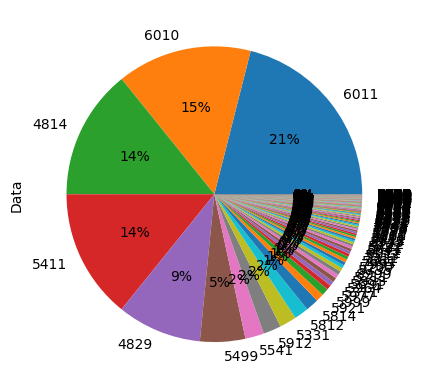

In [ ]:
df_train['Data'].explode().value_counts().plot.pie(autopct='%1.0f%%')

In [ ]:
df_train['Data'].explode().value_counts()[7338]

41

In [ ]:
mcc2label[7338]

57

In [ ]:
df_train

,Id,Data,Target
0,0,"[4814, 4814, 6010, 6011, 4814, 6011, 6011, 481...","[4814, 4814, 4814, 4814, 5411, 4814, 4814, 481..."
1,1,"[6011, 6011, 6011, 6011, 6011, 6011, 6011, 481...","[4814, 6011, 4814, 6011, 4814, 4814, 6011, 481..."
2,2,"[8021, 6011, 6011, 6010, 4829, 4814, 6011, 601...","[6011, 6011, 6010, 4829, 4829, 6010, 6011, 601..."
3,3,"[4814, 6011, 4814, 4814, 4814, 6011, 6011, 569...","[6011, 6011, 6010, 6011, 6011, 4814, 4814, 601..."
4,4,"[4814, 4814, 4814, 4814, 4814, 4814, 5946, 481...","[5499, 6011, 4814, 4829, 5200, 5411, 5499, 591..."
...,...,...,...
7028,7028,"[6010, 4829, 6011, 6011, 6011, 6010, 6011, 601...","[4814, 5499, 5499, 5411, 5251, 4814, 5499, 549..."
7029,7029,"[4814, 5699, 5641, 5411, 6010, 6011, 4814, 601...","[6011, 5261, 6011, 5261, 4814, 5411, 4814, 601..."
7030,7030,"[6011, 6011, 6011, 6011, 6011, 6011, 6011, 601...","[6011, 6011, 6011, 6011, 6011, 6011, 6011, 601..."
7031,7031,"[4814, 4814, 5411, 6011, 6011, 4814, 4814, 481...","[4814, 6011, 6011, 5999, 5999, 6011, 6011, 601..."


<Axes: >

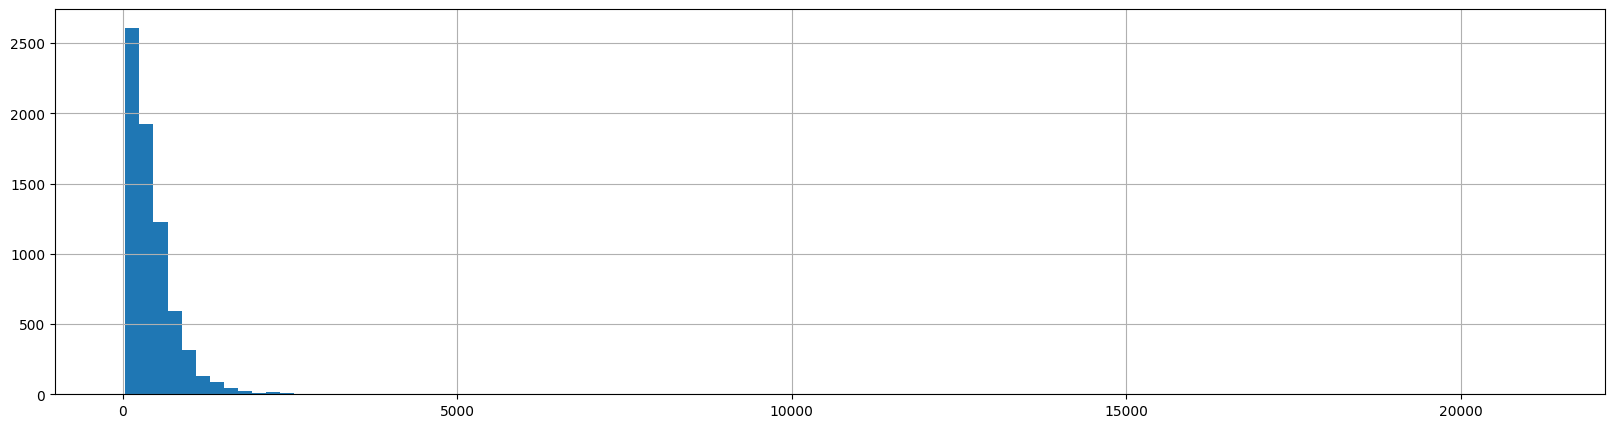

In [ ]:
# хотелось бы вообще посомотреть какие длины последовательностей у нас есть

# количество слов - количество поэм

seq_len = [len(str(i).split()) for i in df_train.Data]
pd.Series(seq_len).hist(bins = 100, figsize=(20,5))

In [ ]:
lengths = {j: len(i) for i, j in zip(df_train['Data'], df_train["Id"])}

# посмотрим сколько реально больших стихотворений
keys_1000 = [key for key, val in lengths.items() if val < 2000]
len(keys_1000)

6955

In [ ]:
for _, i in df_train.iterrows():
  if _ == 154:
    print(np.array([i.Data + i.Target]))

[[4814 6011 6011 6011 6011 6011 5331 6011 6011 5541 4814 5541 6011 4814
  4814 4814 4814 4814 6011 4814 6011 4814 6011 4814 5331 6011 5331 5331
  5331 5331 4814 4814 4814 5331 5331 4814 5331 5331 6011 5331 4814 4814
  5331 5331 4814 4814 4814 5331 5331 5331 6010 6010 6011 4814 5331 4814
  4814 5331 5331 4814 6011 5331 5331 4814 5331 5331 6011 4814 5331 6011
  4814 5999 5331 5331 5331 5331 5331 5331 5331 4814 5331 6011 6011 6011
  5331 6011 6011 6011 5331 6011 6011 6011 4814 6011 5921 6011 5331 6011
  6011 6011]]


In [ ]:
mcc_codes_test = set()

for _, i in df_test.iterrows():
  mcc_codes_test |= set(i.Data)

mcc_codes = set()

for _, i in df_train.iterrows():
  mcc_codes |= set(i.Data)

all_codes = mcc_codes_test| mcc_codes

mcc2label = {j: i for i, j in enumerate(all_codes)}
# 0 to 183
label2mcc = {i: j for i, j in enumerate(all_codes)}
mcc_codes_num = len(all_codes)

In [ ]:
# В данном подходе делаем последовательности длины 40, и предсказывает каждый последующий мсс код
# придётся порезать данные на тесте и исследовать только последние 40 кодов
# в таком случае сеть не сможет анализировать более сложные длинные взаимосвязи
#
# рекурентная сеть просто ставит код 77 для всех последовательностей, не выявляет закономерностей
# возможно стоит увеличить длину последовательности

from keras.utils import to_categorical

seq_length = 100
# кодируем метки

X = []
Y = []

for _, i in df_train.iterrows():

  datas = i.Data + i.Target
  datas = list(map(lambda x: mcc2label[x], datas))

    # если длина послед меньше минимальной, в начало бахаем 184 они не значимые
  if len(datas) <= seq_length + 1:
    # последовательность длины 100 и таргет 1, итого 101
    number = seq_length - len(datas) + 1
    # 184 - служебный символ, означающий НИЧЕГО
    datas = [184]*number + datas
    #print(datas)
    #break

    x = np.array([datas[:seq_length]])
    y = np.array([datas[seq_length]])
  else:
    n = len(datas) - seq_length
    x = np.array([datas[j:j + seq_length] for j in range(n)])
    y = np.array([datas[j + seq_length] for j in range(n)])
    #print(x)
    #print(y)
    break

  X.append(x)
  Y.append(y)

In [ ]:
from keras.utils import to_categorical
a = to_categorical([0, 1, 2, 3], num_classes=4)
a

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
a.argmax()

0

In [ ]:
X_array = np.concatenate(X)

In [ ]:
Y_array = to_categorical(np.concatenate(Y), num_classes=mcc_codes_num)

In [ ]:
X_array[0]

array([112, 112, 163, 164, 112, 164, 164, 112, 164, 164, 112, 164, 112,
       112, 164, 164, 112, 112, 164, 164, 164, 112, 112, 164, 164, 164,
       164, 112, 112, 164, 164, 164, 164, 112, 164, 112, 112, 112, 112,
       112, 164, 164, 112, 112, 112, 112, 164, 164, 164, 112, 164, 164,
       112, 164, 112, 164, 164, 112, 164, 164, 112, 164, 112, 112, 112,
       164, 164, 112, 164, 112, 164, 164, 164, 164, 164, 112,  50, 112,
        41, 164, 164, 112, 164, 112, 164, 164, 112,  41, 112, 112, 112,
       164,  50, 164,  41,  50, 164,  50,  50,  41])

In [ ]:
X_array[1]

array([112, 163, 164, 112, 164, 164, 112, 164, 164, 112, 164, 112, 112,
       164, 164, 112, 112, 164, 164, 164, 112, 112, 164, 164, 164, 164,
       112, 112, 164, 164, 164, 164, 112, 164, 112, 112, 112, 112, 112,
       164, 164, 112, 112, 112, 112, 164, 164, 164, 112, 164, 164, 112,
       164, 112, 164, 164, 112, 164, 164, 112, 164, 112, 112, 112, 164,
       164, 112, 164, 112, 164, 164, 164, 164, 164, 112,  50, 112,  41,
       164, 164, 112, 164, 112, 164, 164, 112,  41, 112, 112, 112, 164,
        50, 164,  41,  50, 164,  50,  50,  41,  41])

In [ ]:
Y_array[0].argmax()

41

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
stack = np.concatenate(Y)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(stack), y=stack)
print(class_weights)

[9.63459079e+01 9.51027349e+01 2.39611897e+00 2.63230784e+02
 1.14894185e+01 2.68994962e+00 2.68016798e+02 2.45763987e+00
 2.07618647e+02 1.05594011e+01 5.59427852e+00 4.09470109e+02
 1.79789290e+00 1.16070267e+02 2.72980072e+02 1.81986715e+02
 6.11656594e+01 5.26461568e+02 3.35020998e+02 1.53551291e+02
 1.22841033e+03 1.30519957e+00 8.52076527e+00 9.21307745e+02
 3.59184306e+00 5.24588040e+01 5.71353640e+01 1.16070267e+02
 9.82728261e+01 1.55183955e+00 4.60653872e+00 1.87782470e+01
 1.41739653e+02 1.28629354e+01 2.91899483e+00 1.29601933e+00
 2.20013790e+02 3.34792730e+00 1.77601493e+02 1.57656940e+01
 1.48254289e+00 1.20827245e+02 1.00965232e+02 2.63230784e+02
 6.64005582e+01 1.41331965e+01 8.67113171e+01 8.18940217e+01
 1.63424877e+01 7.87022099e+00 2.55475284e+01 2.94818478e+00
 2.19653165e+00 7.37046196e+02 4.54966787e+00 2.51981605e+01
 1.18878419e+02 3.98403349e+02 2.58612700e+02 3.50974379e+01
 3.20454868e+02 2.26783445e+01 3.27067316e-01 4.19969342e+00
 3.66006801e-01 1.201379

In [ ]:
print(X_array.shape,Y_array.shape)

(2712330, 100) (2712330, 184)


In [ ]:
# too heavy
main_path = "/content/drive/MyDrive/alpha trans/datasets/"

np.save(file=main_path + "X_big_win_100", arr = X_array)
np.save(file=main_path + "y_big_win_100", arr = Y_array)

In [ ]:
main_path = "/content/drive/MyDrive/alpha trans/datasets/"

np.save(file=main_path + "X_middle_win_100", arr = X_array[:1_000_000])
np.save(file=main_path + "y_middle_win_100", arr = Y_array[:1_000_000])

In [ ]:
main_path = "/content/drive/MyDrive/alpha trans/datasets/"

np.save(file=main_path + "X_havy_win_100", arr = X_array[:1_500_000])
np.save(file=main_path + "y_havy_win_100", arr = Y_array[:1_500_000])

In [ ]:
# too heavy
import numpy as np

main_path = "/content/drive/MyDrive/alpha trans/datasets/"

X_array = np.load(file=main_path + "X_middle_win_100.npy")
Y_array = np.load(file=main_path + "y_middle_win_100.npy")

In [ ]:
# too heavy
import numpy as np

main_path = "/content/drive/MyDrive/alpha trans/datasets/"

X_array = np.load(file=main_path + "X_big_win_100.npy")
Y_array = np.load(file=main_path + "y_big_win_100.npy")

In [ ]:
# too heavy
main_path = "/content/drive/MyDrive/alpha trans/datasets/"

np.save(file=main_path + "X_tiny_win_40", arr = X_array[:10_000])
np.save(file=main_path + "y_tiny_win_40", arr = Y_array[:10_000])

np.save(file=main_path + "X_small_win_40", arr = X_array[:100_000])
np.save(file=main_path + "y_small_win_40", arr = Y_array[:100_000])

np.save(file=main_path + "X_middle_win_40", arr = X_array[:1_000_000])
np.save(file=main_path + "y_middle_win_40", arr = Y_array[:1_000_000])

np.save(file=main_path + "X_big_win_40", arr = X_array)
np.save(file=main_path + "y_big_win_40", arr = Y_array)

In [ ]:
models = dict()
# модели обучаются долго, а переобучаются быстро, решение:
from keras.callbacks import ModelCheckpoint

def checkpoint(models, model_name, monitor='val_loss'):
    model_save_path = model_name + '.h5'
    models[model_name] = ModelCheckpoint(model_save_path,
                                monitor=monitor,
                                verbose=1,
                                save_best_only=True
                                )
    return models

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graph(history):

    plt.plot(history.history['accuracy'],
            label='True answers part on TRAIN'
            )
    plt.plot(history.history['val_accuracy'],
            label='True answers part on VALID'
            )
    plt.xlabel('train Epoch')
    plt.ylabel('True answers part')
    plt.legend()
    plt.show()

In [ ]:
## An example of building a RNN model
## with LSTM layer

from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense, LSTM, Input
from keras.layers import Embedding
from keras.layers import Bidirectional
import tensorflow as tf


def lstm_nn_fit(X_train, y_train, models, model_name, epochs, mcc_codes_num,
                            trainable=True, batch_size=64):

    embedding_dim = 30
    input_length = len(X_train[0]) # длина последовательности
    # служебный [-1]
    vocab_size = mcc_codes_num+1
    tf.random.set_seed(1)

    ## build the model
    bi_lstm_model = Sequential([
        # Turns positive integers (indexes) into dense vectors of fixed size.
        # поэтому нельзя кодировать значения в -1
        Embedding(input_dim=vocab_size,
                  output_dim=embedding_dim,
                  input_length = input_length,
                  name='embed-layer',
                  trainable=trainable
                  ),
        Bidirectional(LSTM(128, name='lstm1-layer', return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(64, name='lstm2-layer', return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(32, name='lstm3-layer')),
        Dense(vocab_size-1, activation='softmax'),
    ])

    bi_lstm_model.summary()

    ## compile and train:
    bi_lstm_model.compile(
        optimizer = Adam(1e-2),
        loss = "categorical_crossentropy",
        metrics=["accuracy"])

    history = bi_lstm_model.fit(
        X_train,
        y_train,
        epochs=epochs,
        validation_split=0.1,
        callbacks=[models[model_name]],
        batch_size=batch_size,
        #class_weights=class_weights
        )

    bi_lstm_model.load_weights(models[model_name].filepath)

    plot_graph(history)

    return bi_lstm_model

In [ ]:
# Prepare the text sampling function

def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds[0]).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [ ]:
epochs = 15
max_len = seq_length = 100

# 2 # keras_pad_norm_seq + glove_embedding_mat - shape(1018, 2047) + shape(13430, 300)
from sklearn.model_selection import train_test_split

lstm_model_name = "lstm_loss_model"
models = checkpoint(models, lstm_model_name, monitor='val_loss')

# данные в виде листов
X_train, X_test, y_train, y_test = train_test_split(X_array, Y_array, train_size=0.9, test_size=0.1 , random_state=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embed-layer (Embedding)     (None, 100, 30)           5550      
                                                                 
 bidirectional (Bidirection  (None, 100, 256)          162816    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 100, 256)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 100, 128)          164352    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 100, 128)          0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                4

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6329/6329 [==============================] - ETA: 0s - loss: 2.0051 - accuracy: 0.4218
Epoch 2: val_loss improved from 2.02554 to 1.98774, saving model to lstm_loss_model.h5
6329/6329 [==============================] - 223s 35ms/step - loss: 2.0051 - accuracy: 0.4218 - val_loss: 1.9877 - val_accuracy: 0.4259
Epoch 3/20
6329/6329 [==============================] - ETA: 0s - loss: 1.9789 - accuracy: 0.4267
Epoch 3: val_loss improved from 1.98774 to 1.96793, saving model to lstm_loss_model.h5
6329/6329 [==============================] - 224s 35ms/step - loss: 1.9789 - accuracy: 0.4267 - val_loss: 1.9679 - val_accuracy: 0.4276
Epoch 4/20
6329/6329 [==============================] - ETA: 0s - loss: 1.9648 - accuracy: 0.4290
Epoch 4: val_loss improved from 1.96793 to 1.95995, saving model to lstm_loss_model.h5
6329/6329 [==============================] - 224s 35ms/step - loss: 1.9648 - accuracy: 0.4290 - val_loss: 1.9600 - val_accuracy: 0.4316
Epoch 5/20
6329/6329 [==========================

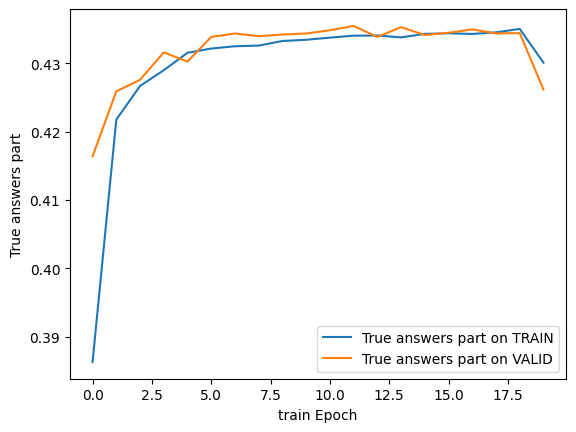

In [ ]:
import random

mcc_codes_num = 184
batch_size = 128
epochs = 8

model = lstm_nn_fit(X_train,
                       y_train,
                       models,
                       lstm_model_name,
                       epochs=20,
                       mcc_codes_num=mcc_codes_num,
                       trainable=True,
                       batch_size=batch_size)

In [ ]:
model.save('/content/drive/MyDrive/alpha trans/model.keras')  # The file needs to end with the .keras extension

In [ ]:
import random

mcc_codes_num = 184
batch_size = 128
epochs = 8

model = lstm_nn_fit(X_train,
                       y_train,
                       models,
                       lstm_model_name,
                       epochs=2,
                       mcc_codes_num=mcc_codes_num,
                       trainable=True,
                       batch_size=batch_size)

for epoch in range(epochs):
    # на каждой эпохе дообучаем модель
    print()
    print("Generating seq", epoch)


    model.fit(
        X_train,
        y_train,
        epochs=2,
        validation_split=0.1,
        batch_size=batch_size,
        #class_weights=class_weights
        )


    # берём рандомный индекс из тестовой выборки
    start_index = random.randint(0, X_test.shape[0]-500)

    # check results
    for diversity in [0.2, 0.5, 1.0, 1.2]:

        print("...Diversity:", diversity)

        # берём случайную цепочку
        seq = X_test[start_index]
        # my targets
        generated = []
        # real targets
        real_trans = []

        seq_length = 100
        # обрубаем всё больше 100
        print(seq)
        seq = seq[len(seq) - seq_length:]

        target = start_index
        # predict seq
        for i in range(10):

            seq = np.array([seq[i: i + seq_length]])
            preds = model.predict(seq)
            next_index = sample(preds, diversity)

            generated.append(next_index)
            seq = np.append(seq, next_index)
            #print(seq)
            real_trans.append(y_test[target].argmax())
            target = start_index + (i+1)

        print("generated", generated)
        print("real", real_trans)
        print(" ")

In [ ]:
model.save('/content/drive/MyDrive/alpha trans/model.keras')  # The file needs to end with the .keras extension

In [ ]:
import keras

loaded_model = keras.models.load_model("/content/drive/MyDrive/alpha trans/model.keras")

In [ ]:
model = loaded_model

In [ ]:
mcc2label

In [ ]:
# Prepare the text sampling function

def sample(preds, temperature):
    # helper function to sample an index from a probability array
    #print(preds)
    preds = np.asarray(preds[0]).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    #print(preds.shape)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [ ]:
def prepare(datas, seq_length=100):

  if len(datas) <= seq_length:
    number = seq_length - len(datas)
    # 184 - служебный символ, означающий НИЧЕГО
    datas = [184]*number + datas
    #print(datas)
    #break
    return datas
  else:
    return datas[len(datas) - seq_length:]


In [ ]:
def predict_all(data, trans_len = 10, diversity=0.5, seq_length=100):

  data["data_1"] = data["Data"].apply(lambda x: [mcc2label[i] for i in x])
  to = data["data_1"].map(prepare)

  datas = []

  for i in range(trans_len):

    to_preceed = []

    for j in to:
      to_preceed.append(j[i: i + seq_length])

    #print(to_preceed[1])
    pred = model.predict(to_preceed)

    #print(pred.shape)
    # next_index = [sample([k], diversity) for k in pred]
    next_index = [np.argmax(k) for k in pred]


    datas.append(next_index)
    #print(next_index)
    #break
    #print(to)
    to = [r + [n] for r, n in zip(to, next_index)]


  rez = [list(map(lambda x: label2mcc[x], l)) for l in np.array(datas).transpose()]

  return rez

In [ ]:

# without sample 0.2541793167809804
for i in [0.2, 0.5, 1.0, 1.2]:

  rez = predict_all(df_train, diversity=i)
  print(mapk(df_train['Target'], rez))

In [ ]:
label2mcc[56]

7841

In [ ]:
def predict_10(seq, trans_len = 10, diversity=1.0, seq_length=100):

  seq = list(map(lambda x: mcc2label[x], seq))
  #print(seq)
  seq = prepare(seq)

  data = []

  for i in range(trans_len):

    x = seq[i: i + seq_length]
    #print(type(x))
    pred = model.predict([x])
    next_index = sample(pred, diversity)

    data.append(next_index)
    seq.append(next_index)

  return list(map(lambda x: label2mcc[x], data))

In [ ]:
rez = dict()

for i in [0.2, 0.5, 1.0, 1.2]:

  i = 0.2
  print(f"div_{i}")
  df_train[f"rnn_preds_{i}"] = df_train["Data"].map(lambda x: predict_10(seq=x, diversity=i))
  print(mapk(df_train['Target'], df_train[f"rnn_preds_{i}"]))
  break


In [ ]:
# target, pred
# сильнее оценивает последние предсказания, похуй на порядок
mapk([[1,2,3,4,5,6,7,8,9,1]], [[10,2,3,4,5,6,7,8,9,10]])

0.6171031746031745

In [ ]:
mapk([[11,2,33,44,55,66,77,88,99,1]], [[10,2,3,4,5,6,7,8,9,10]])

0.05

In [ ]:
mapk(df_train['Target'], df_train['pred_lstm'])

In [ ]:
rez = predict_all(df_test)

220/220 [==============================] - 39s 176ms/step


## Submission

In [ ]:
df_test['Predicted'] = pd.Series(data=rez)

In [ ]:
df_test.head()

,Id,Data,data_1,Predicted
0,0,"[4814, 4814, 6011, 6011, 6010, 6011, 6011, 481...","[112, 112, 164, 164, 163, 164, 164, 112, 164, ...","[6011, 6011, 6011, 6011, 6011, 6011, 6011, 601..."
1,1,"[6010, 6011, 6010, 5411, 5411, 5977, 6011, 601...","[163, 164, 163, 50, 50, 154, 164, 163, 50, 164...","[5722, 5722, 5722, 5722, 5722, 5722, 5722, 572..."
2,2,"[4814, 6011, 5251, 6011, 7832, 5641, 5814, 482...","[112, 164, 30, 164, 99, 79, 106, 114, 41, 163,...","[6010, 6010, 6010, 6010, 6010, 6010, 6010, 601..."
3,3,"[6011, 4722, 4722, 4722, 4814, 6011, 6011, 482...","[164, 97, 97, 97, 112, 164, 164, 114, 164, 164...","[6011, 6011, 6011, 6011, 6011, 6011, 6011, 601..."
4,4,"[4814, 4814, 4814, 6011, 4814, 4814, 4814, 481...","[112, 112, 112, 164, 112, 112, 112, 112, 112, ...","[4814, 4814, 4814, 4814, 4814, 4814, 4814, 481..."


In [ ]:
submission_baseline_2 = df_test[['Id', 'Predicted']]
submission_baseline_2['Predicted'] = submission_baseline_2.Predicted.astype(str).str.replace(',', '')
submission_baseline_2.to_csv('submission_baseline_2.csv', index=False)